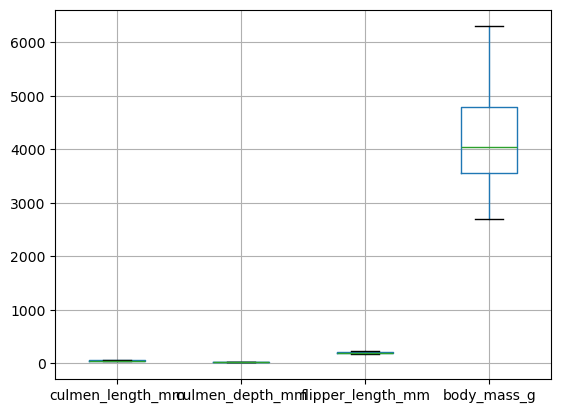

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

PATH = "penguins.csv"

dataset = pd.read_csv(PATH)

# Удаление неопределенных рядов
dataset = dataset.dropna()

# Удаление выбросов
dataset = dataset[dataset['flipper_length_mm'] < 1500]
dataset = dataset[dataset['flipper_length_mm'] > 0]

dataset.index = [index for index in range(len(dataset))]

dataset.boxplot()
plt.show()

In [85]:
%env OMP_NUM_THREADS=2

env: OMP_NUM_THREADS=2


In [14]:
# Create dummy varialbes

dataset = pd.get_dummies(dataset).drop("sex_.", axis=1)
dataset.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
3,36.7,19.3,193.0,3450.0,True,False
4,39.3,20.6,190.0,3650.0,False,True


In [16]:
# Normalize

scaler = StandardScaler()
X = scaler.fit_transform(dataset)
dataset_normalized = pd.DataFrame(data=X, columns=dataset.columns)
dataset_normalized.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


In [18]:
# Principal components analysis

pca = PCA(n_components=None)
dfx_pca = pca.fit(dataset_normalized)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
dataset_pca = pca.fit_transform(dataset_normalized)

print(f'Principal components: {n_components}')

Principal components: 2


In [20]:
# INERTIA

clusters_range = range(1, 10)

inertia = []
for i in clusters_range:
    k_means = KMeans(n_clusters=i).fit(dataset_pca)
    inertia.append(k_means.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

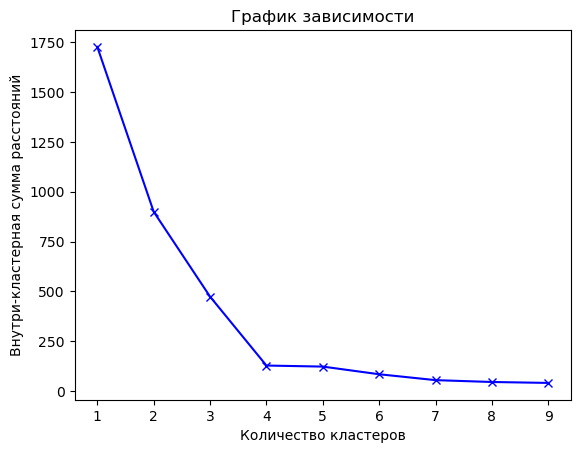

In [22]:
plt.plot([x for x in clusters_range], inertia, 'bx-')
plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')
plt.show()

In [26]:
# По методу локтя
CLUSTERS = 4

In [28]:
kmeans = KMeans(n_clusters=CLUSTERS, random_state=42).fit(dataset_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


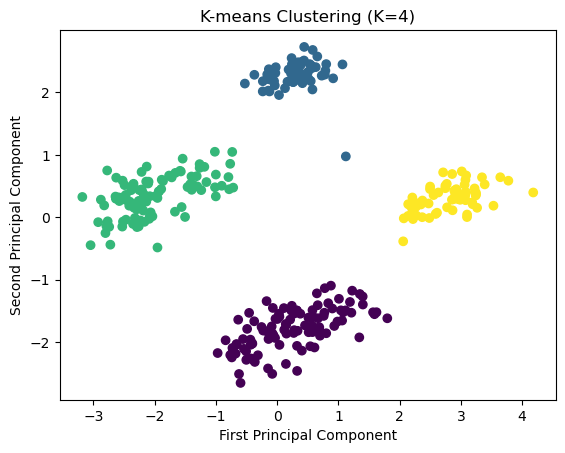

In [30]:
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={CLUSTERS})")
plt.show()

In [32]:
# Без метода главных компонент

# INERTIA

inertia2 = []
for i in clusters_range:
    k_means = KMeans(n_clusters=i).fit(dataset_normalized)
    inertia2.append(k_means.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

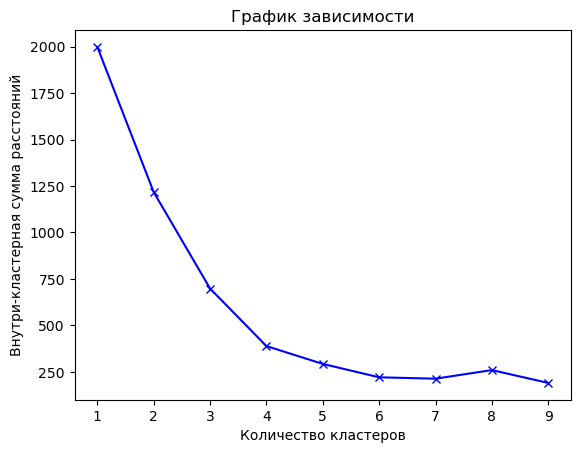

In [34]:
plt.plot([x for x in clusters_range], inertia2, 'bx-')
plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')
plt.show()

In [38]:
# По методу локтя
CLUSTERS2 = 4

In [40]:
kmeans2 = KMeans(n_clusters=CLUSTERS2, random_state=42).fit(dataset_normalized)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [42]:
clusters = pd.DataFrame(
 columns=dataset_normalized.columns,
 data=kmeans2.cluster_centers_
)
clusters["Amount"] = np.unique(
 kmeans2.labels_,
 return_counts=True
)[1]

clusters

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,Amount
0,-0.026530,1.003413,-0.446458,-0.250855,-0.991031,0.997001,106
1,1.002782,-0.731400,1.463281,1.585988,-0.991031,0.997001,61
2,-0.699904,0.236486,-0.854228,-0.980810,1.009050,-1.003008,107
3,0.280207,-1.475431,0.838419,0.589695,0.975150,-1.003008,59
